In [82]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Data Preparation

## Data Loading

In [83]:
df = pd.read_csv('/Users/lukastillmann/Desktop/datasets/newspaper/archive/Lead Scoring.csv')

In [84]:
df.shape

(9240, 37)

In [85]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Inspection

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [87]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [88]:
df["Prospect ID"].duplicated().sum()

0

## Data Cleaning

In [89]:
# replace "Select" Values with NaN
df.replace("Select", np.nan, inplace=True)

<Axes: >

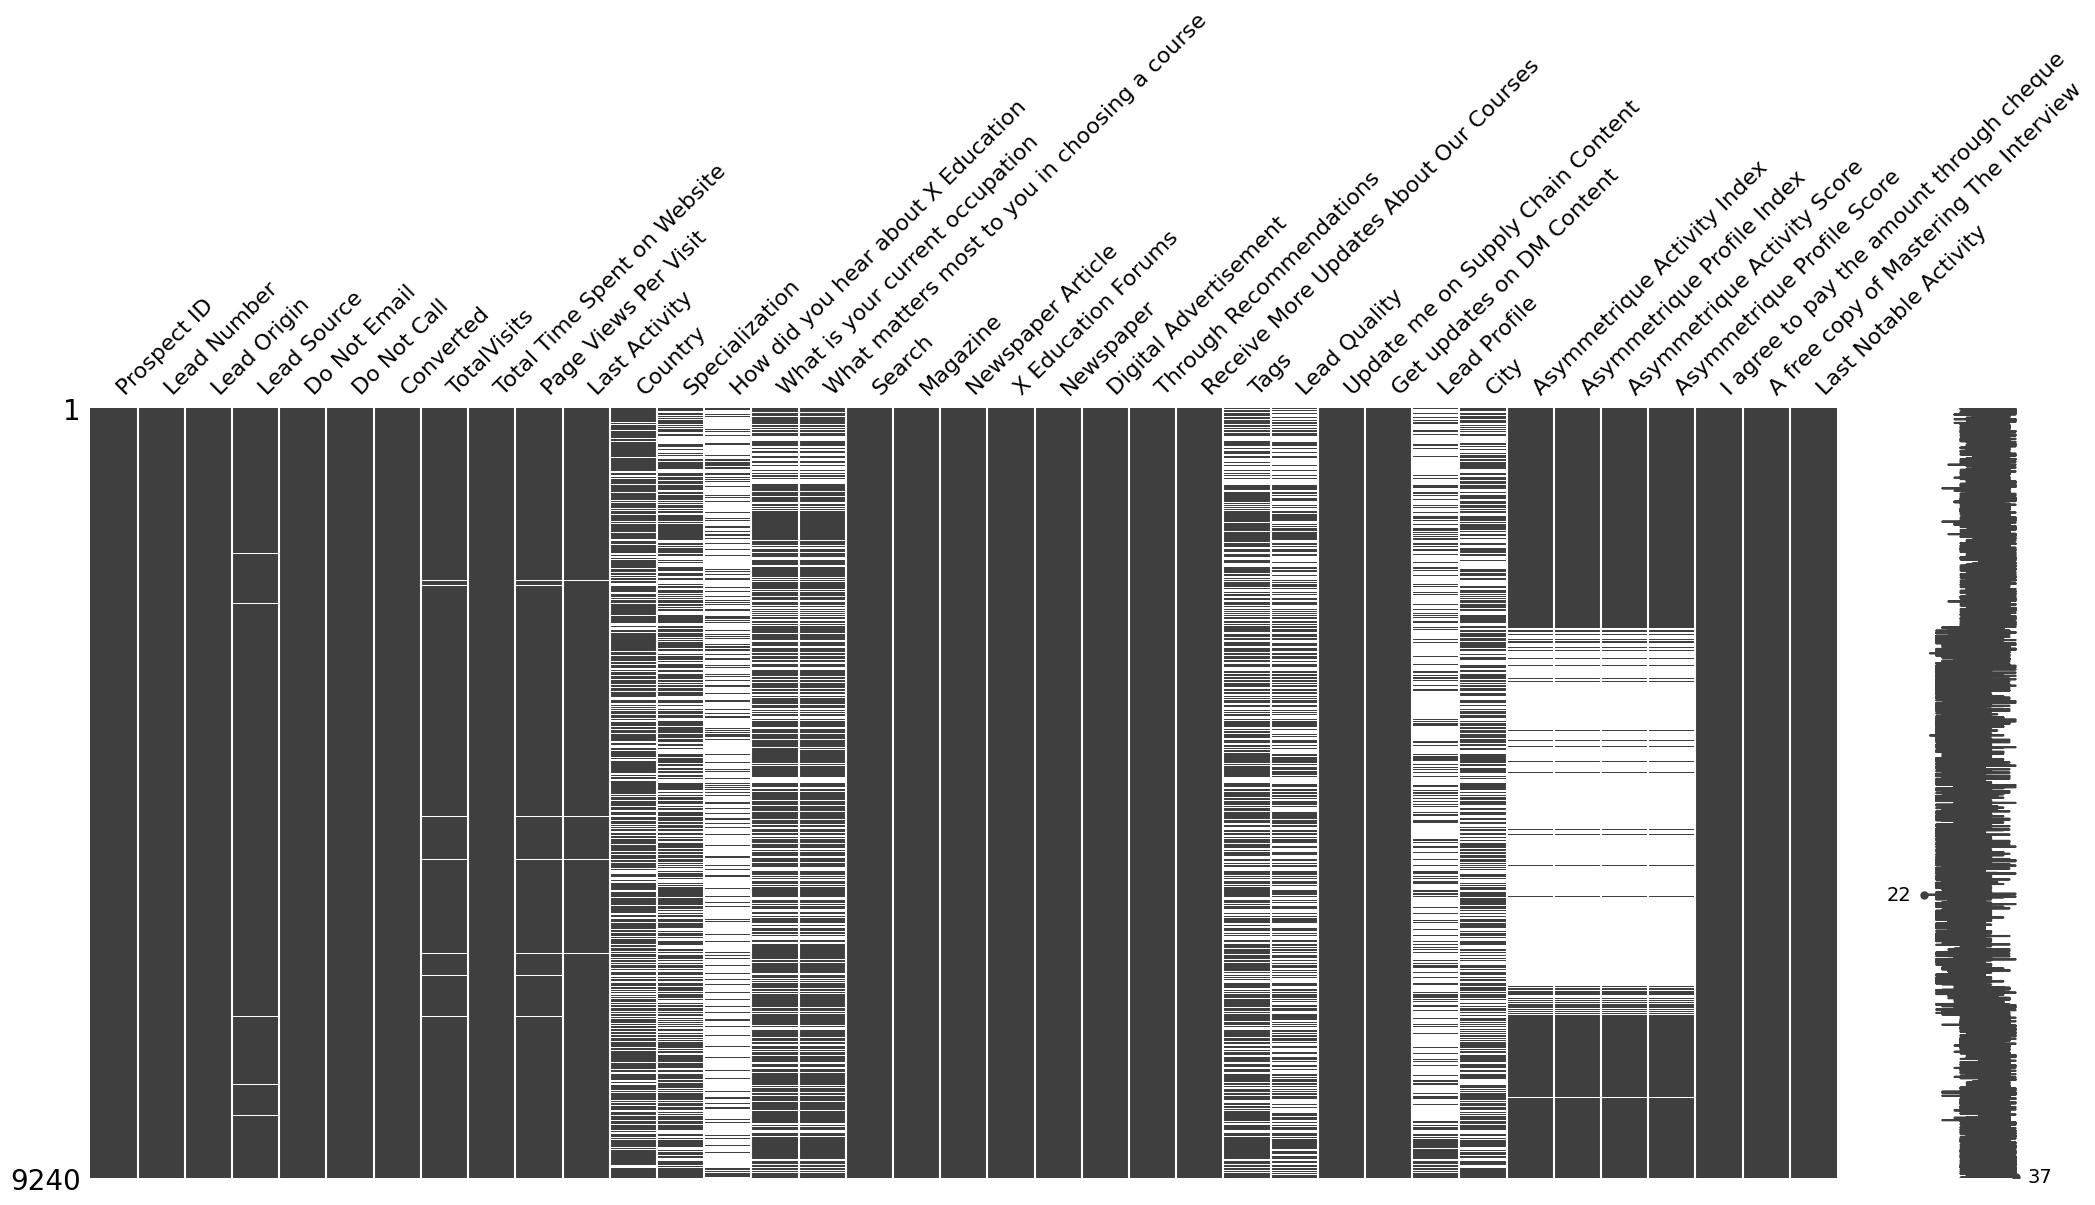

In [90]:
# visualize missing values
msno.matrix(df)

In [91]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [92]:
# drop columns with less than 70 percent values present
df.dropna(thresh=len(df)*0.3, axis=1, inplace=True)

In [93]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [94]:
# inspect NaN columsn one by one

In [95]:
# lead source
df["Lead Source"].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

<Axes: xlabel='count', ylabel='Lead Source'>

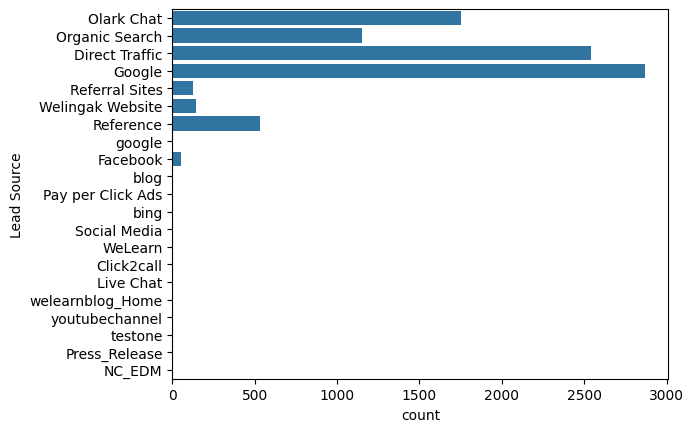

In [96]:
sns.countplot(df["Lead Source"])

In [97]:
# impute missing values with google
df["Lead Source"] = df["Lead Source"].replace(np.nan, "Google")
# replace "google" with "Google"
df["Lead Source"] = df["Lead Source"].replace("google", "Google")

In [98]:
df["Lead Source"].isnull().sum()

0

In [99]:
# total visits
df.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: xlabel='TotalVisits', ylabel='Count'>

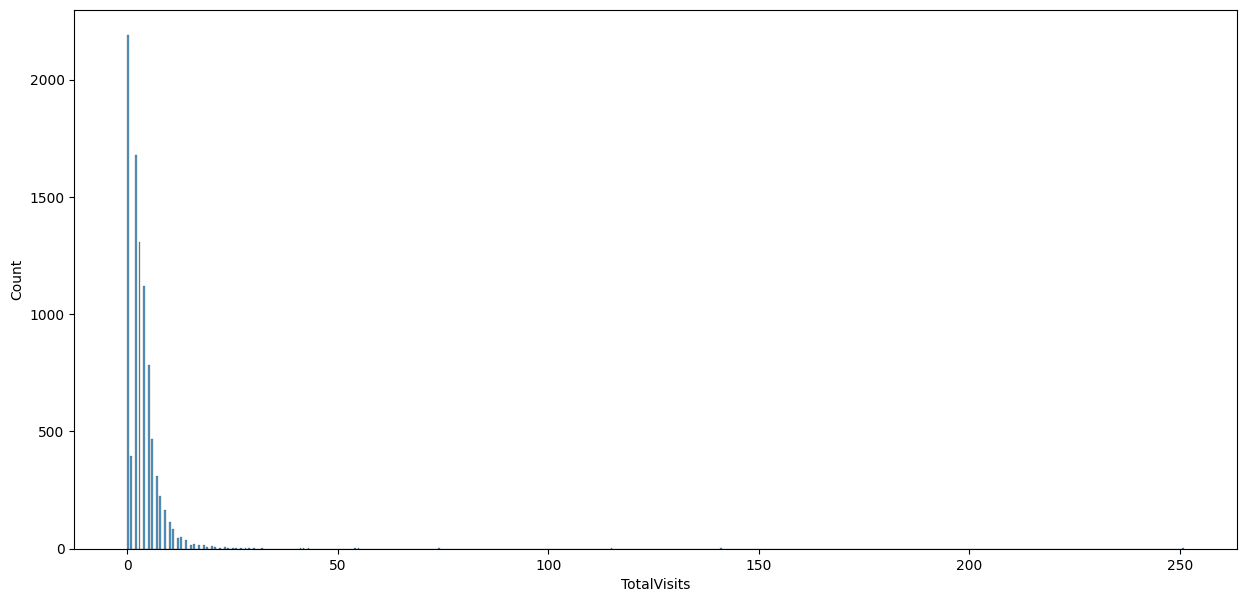

In [100]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df["TotalVisits"], ax=ax)

In [101]:
# we can see most total visits are between 0 and 30, average between 3 and 4 site visits

In [102]:
# replace nan values with 3 and convert to int
df["TotalVisits"] = df["TotalVisits"].replace(np.nan, 3).astype(int)

In [103]:
df["TotalVisits"].isnull().sum()

0

In [104]:
# Page Views Per Visit
df["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: xlabel='Page Views Per Visit', ylabel='Count'>

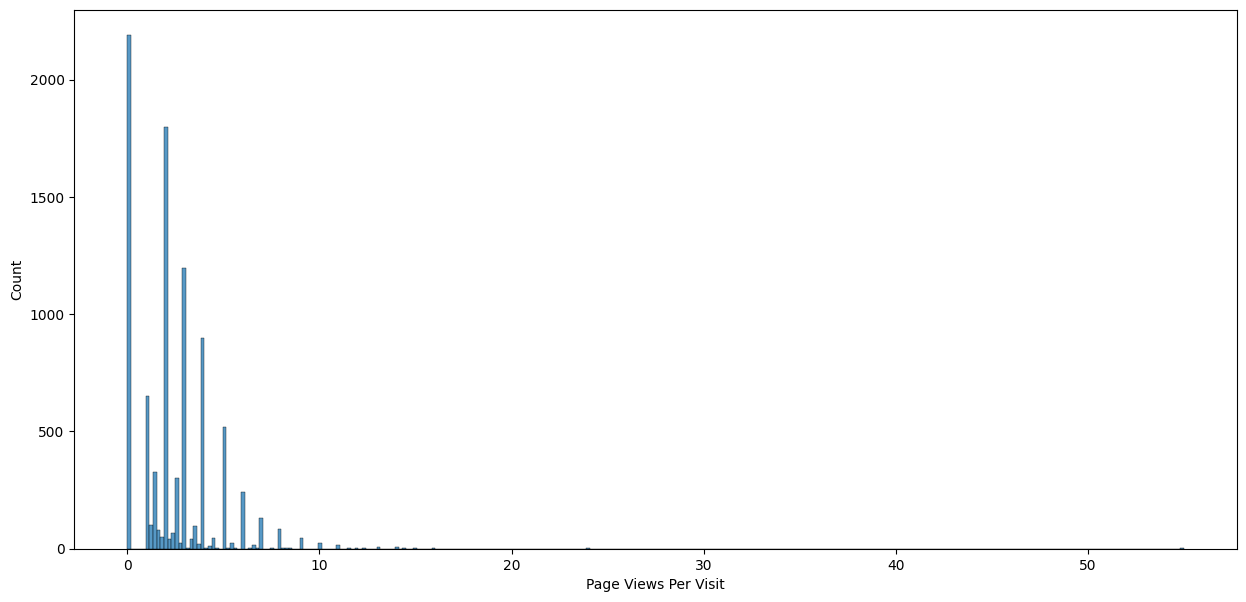

In [105]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(df["Page Views Per Visit"], ax=ax)

In [106]:
# most values between 1 and 10, mean at around 2

In [107]:
# replace nan values with 2 and convert to int
df["Page Views Per Visit"] = df["Page Views Per Visit"].replace(np.nan, 2).astype(int)

In [108]:
df["Page Views Per Visit"].isnull().sum()

0

In [109]:
# Last Activity
df["Last Activity"].describe()

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

<Axes: xlabel='count', ylabel='Last Activity'>

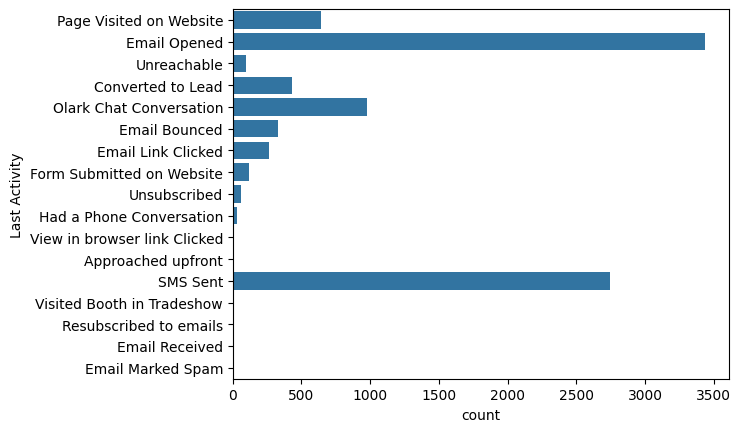

In [110]:
sns.countplot(df["Last Activity"])

In [111]:
df["Last Activity"] = df["Last Activity"].replace(np.nan, "Email Opened")

In [112]:
df["Last Activity"].isnull().sum()

0

In [113]:
# Country
df["Country"].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

<Axes: xlabel='count', ylabel='Country'>

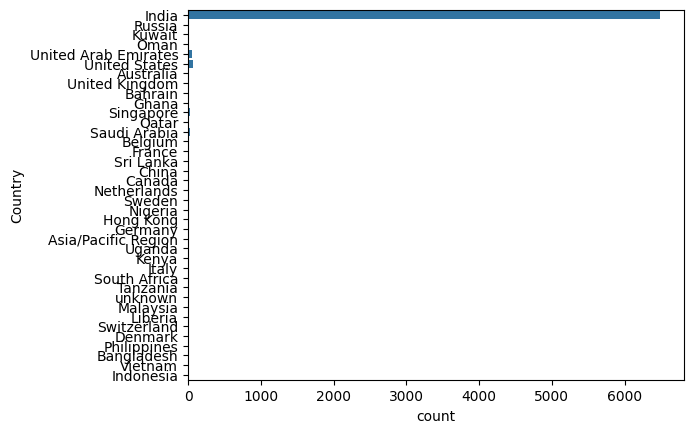

In [114]:
sns.countplot(df["Country"])

In [115]:
# we see india is most present and we have a lot of values missing, therfore we drop the country column as it is not very informative
df = df.drop(columns="Country", axis=1)

In [116]:
# Specialization
df["Specialization"].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [117]:
df["Specialization"].head()

0                        NaN
1                        NaN
2    Business Administration
3      Media and Advertising
4                        NaN
Name: Specialization, dtype: object

<Axes: xlabel='count', ylabel='Specialization'>

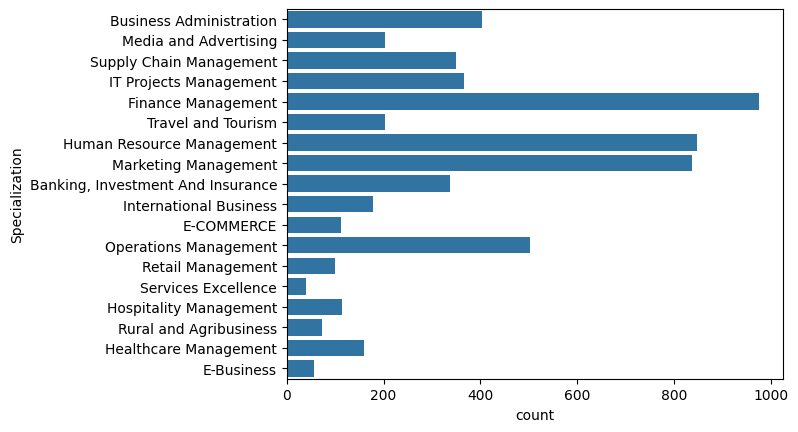

In [118]:
sns.countplot(df["Specialization"])

In [119]:
# we have a lot of missing values, which likely originate from that the lead has not yet selected a Specialization.
# hence, we opt to create an additional category "miscellaneous"
df["Specialization"] = df["Specialization"].replace(np.nan, "Miscellaneous")

<Axes: xlabel='count', ylabel='What is your current occupation'>

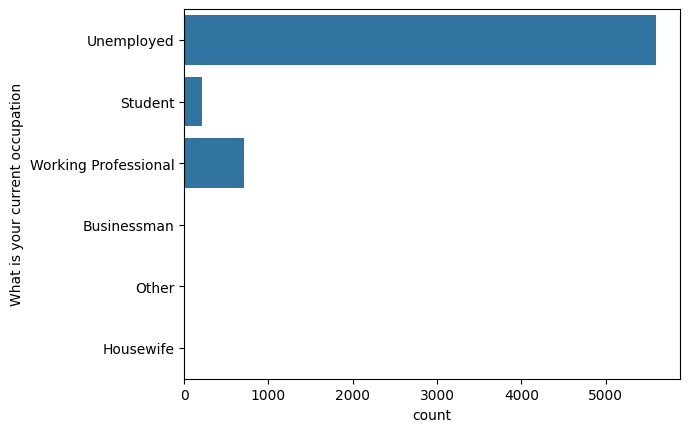

In [120]:
# What is your current occupation
sns.countplot(df["What is your current occupation"])

In [121]:
# impute Unemployers for NaN values 
df["What is your current occupation"] = df["What is your current occupation"].replace(np.nan, "Unemployed")

In [122]:
df["What is your current occupation"].isnull().sum()

0

<Axes: xlabel='count', ylabel='What matters most to you in choosing a course'>

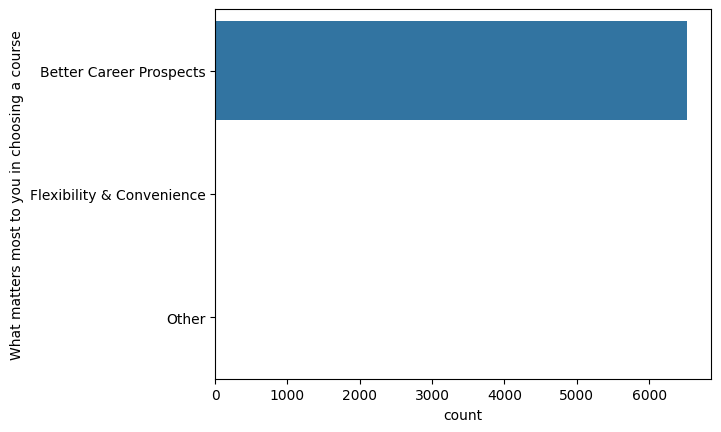

In [123]:
# What matters most to you in choosing a course
sns.countplot(df["What matters most to you in choosing a course"])

In [124]:
# drop column because almost all entries are Unemployed or NaN, no informative value
df.drop(columns="What matters most to you in choosing a course", axis=1, inplace=True)

<Axes: xlabel='count', ylabel='Tags'>

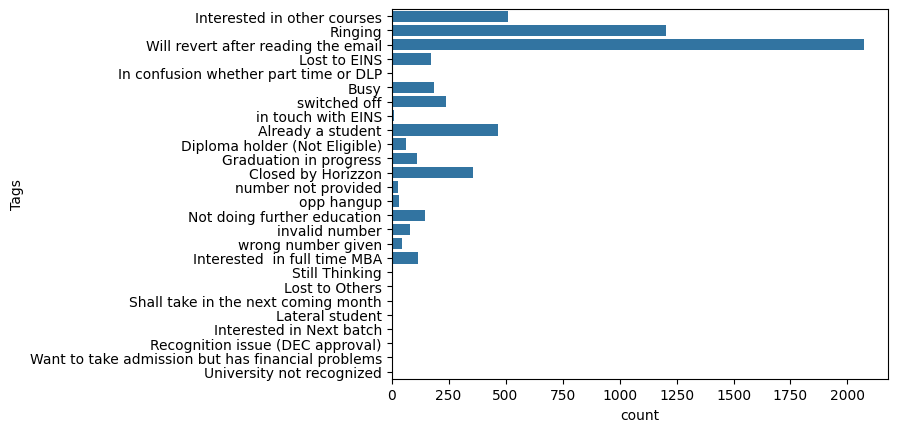

In [125]:
# Tags
sns.countplot(df["Tags"])

In [126]:
df["Tags"] = df["Tags"].replace(np.nan, "Will revert after reading the email")

<Axes: xlabel='count', ylabel='Lead Quality'>

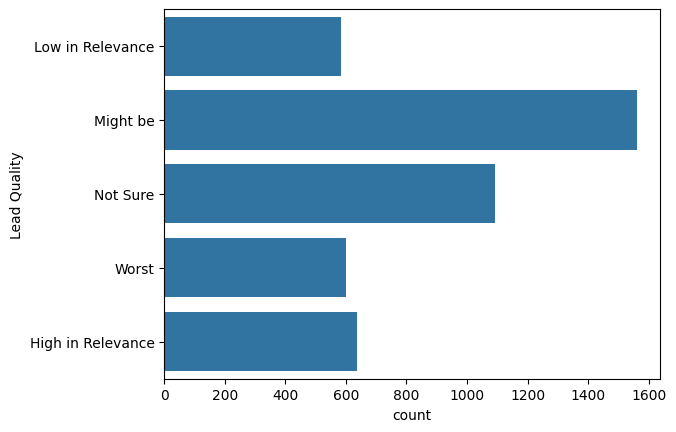

In [127]:
# Lead Quality
sns.countplot(df["Lead Quality"])

In [128]:
# impute missing values with "Not sure", as this makes the most sense semantically
df["Lead Quality"] = df["Lead Quality"].replace(np.nan, "Not Sure")

<Axes: xlabel='count', ylabel='City'>

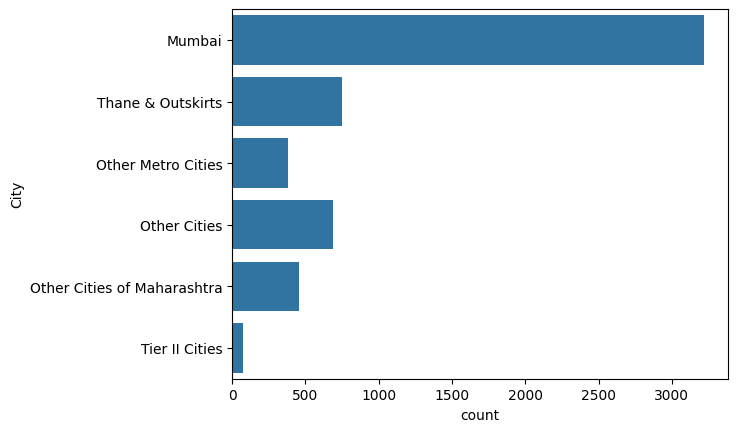

In [129]:
# City
sns.countplot(df["City"])

In [130]:
# as Mumbai is the most common city, we will impute msissing values with it
df["City"] = df["City"].replace(np.nan, "Mumbai")

<Axes: xlabel='count', ylabel='Asymmetrique Activity Index'>

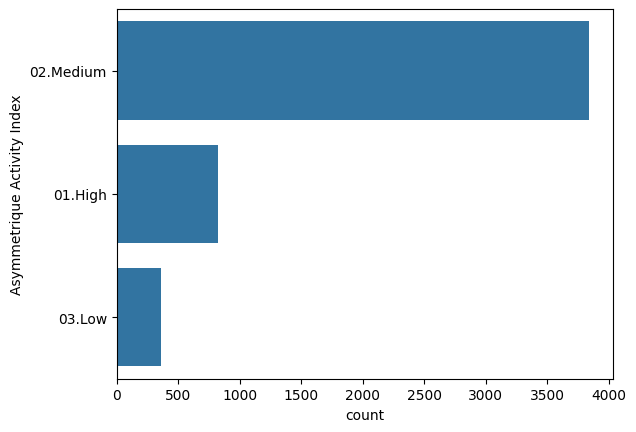

In [139]:
sns.countplot(df["Asymmetrique Activity Index"])

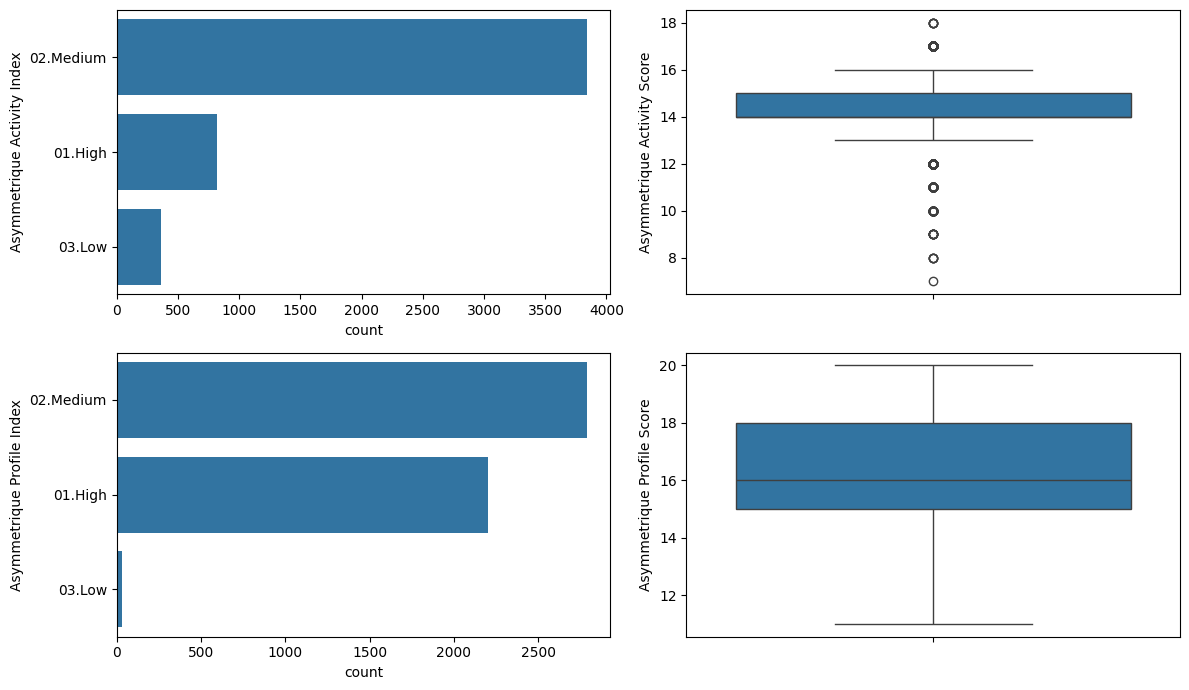

In [142]:
# Asymmetrique Columns
fig, axs = plt.subplots(2, 2, figsize = (12, 7))
plt1 = sns.countplot(df["Asymmetrique Activity Index"], ax = axs[0, 0])
plt2 = sns.boxplot(df["Asymmetrique Activity Score"], ax = axs[0, 1])
plt3 = sns.countplot(df["Asymmetrique Profile Index"], ax = axs[1, 0])
plt4 = sns.boxplot(df["Asymmetrique Profile Score"], ax = axs[1, 1])
plt.tight_layout()



In [143]:
# we have a lot of missing values and it is difficult to impute them a stheir ist too much variation and not semantically logical way to do so
# therefore, we drop those columns
df = df.drop(columns=["Asymmetrique Activity Index", "Asymmetrique Activity Score", "Asymmetrique Profile Index", "Asymmetrique Profile Score"], axis=1)

In [145]:
# check again for null values
df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

# Data Exploration

## Univariate Analysis

In [156]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Target Variable

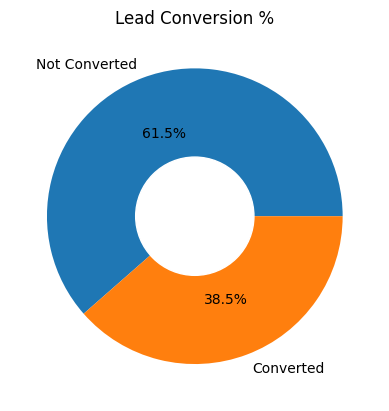

In [146]:
# Target variable "Conversion"; Converted (1) or Not Converted (0)
fig, ax = plt.subplots()
ax.pie(df["Converted"].value_counts(), labels=["Not Converted", "Converted"], autopct='%1.1f%%')
cir = plt.Circle((0, 0), .4, color='white')
ax.add_patch(cir)
plt.title("Lead Conversion %")
plt.show()

### Independent Variables

<Axes: xlabel='Lead Origin', ylabel='count'>

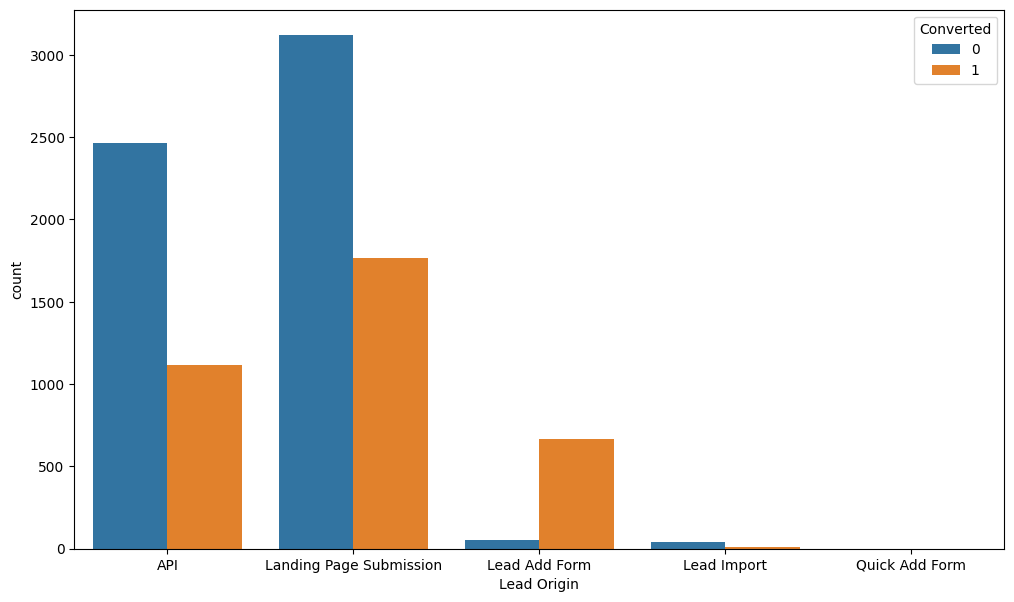

In [153]:
# Lead Origin
fig= plt.figure(figsize=(12,7))
sns.countplot(x="Lead Origin", hue="Converted", data=df)


In [159]:
# we can see that most leads (absolute) stem from the API and Landing Page
# However, most conversions (in relation to lead origin) originate from the Lead Add Form

# 2 Takeaways:
# 1. Improve Conversion Rate for API and Landing Page Submission
# 2. Improve Leads from Lead Add Form

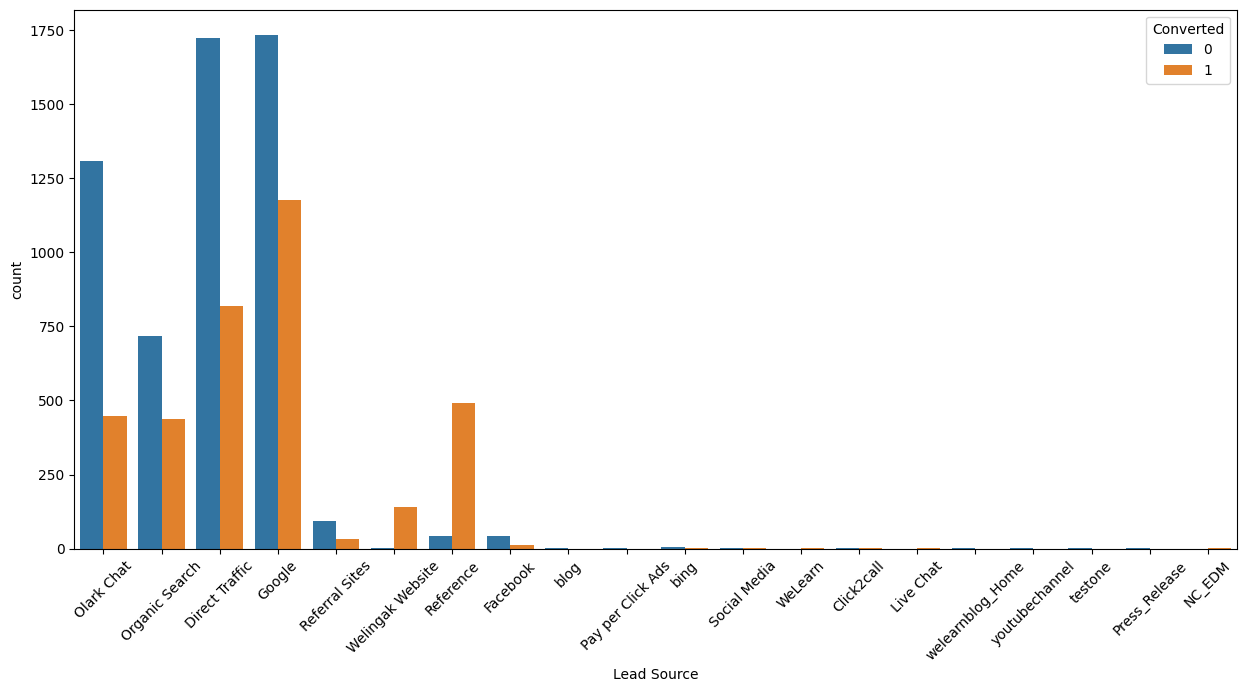

In [164]:
# Lead Source
fig= plt.figure(figsize=(15,7))
sns.countplot(data=df, x="Lead Source", hue="Converted")
plt.xticks(rotation=45)
plt.show()

In [165]:
# most important lead sources are Google, Direct Traffic, Olark Chat, Organic Search and Refferals and Welingak Website
# Conversion Rate is highest (relative) for Refferals and Welingak Website 

# Again, 2 Takeaways:
# 1. Focus on improving Coversion Rate for Google, Direct Traffic, Olark Chat, Organic Search
# 2. Focus on improving Leda Sources from Refernces and Welingak Website

(0.0, 50.0)

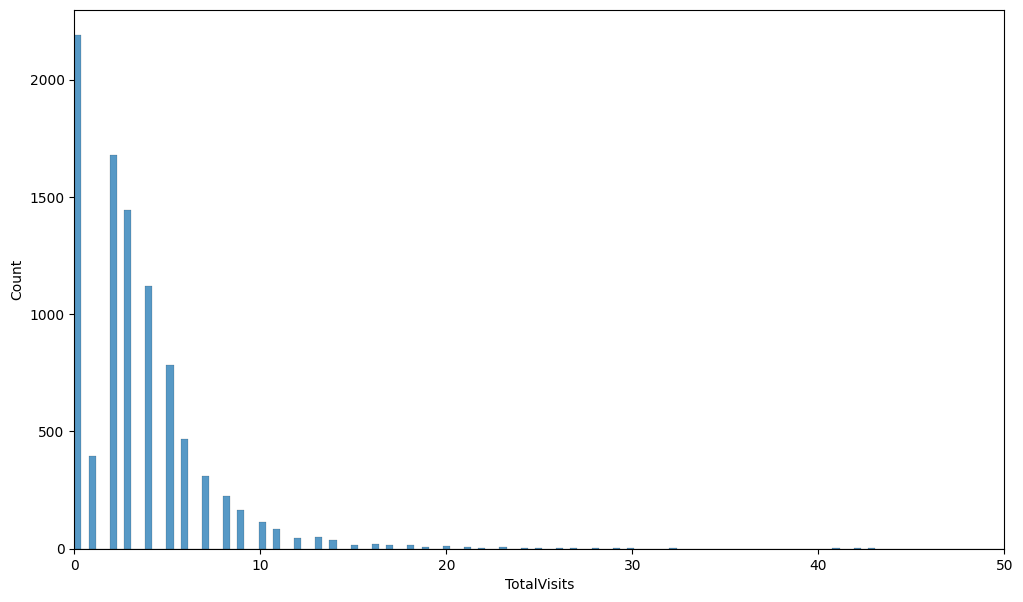

In [134]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(data=df["TotalVisits"])
plt.xlim(0, 50)

<Axes: xlabel='Total Time Spent on Website', ylabel='Count'>

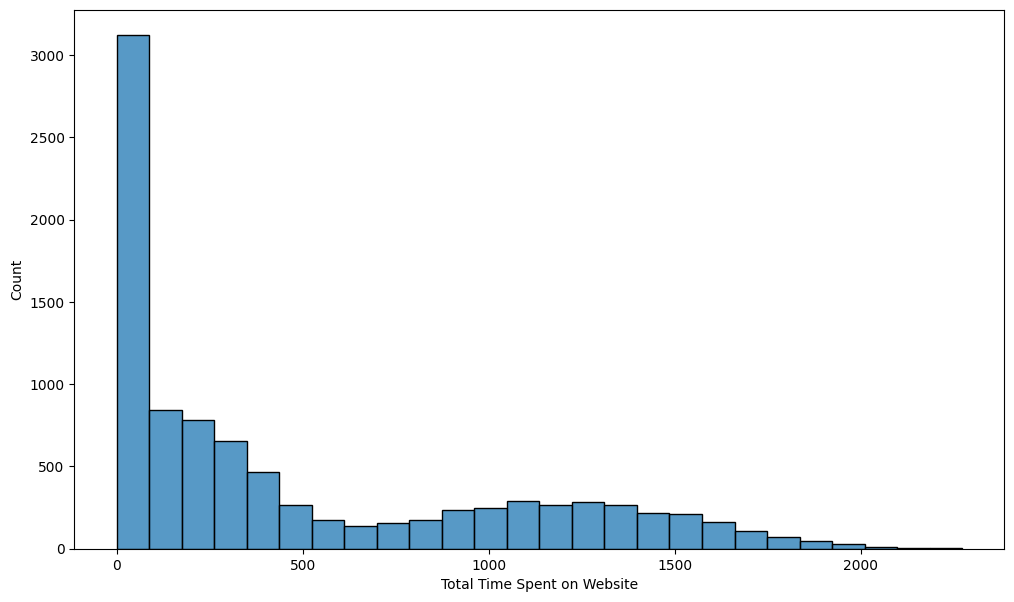

In [135]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(data=df["Total Time Spent on Website"])

(0.0, 30.0)

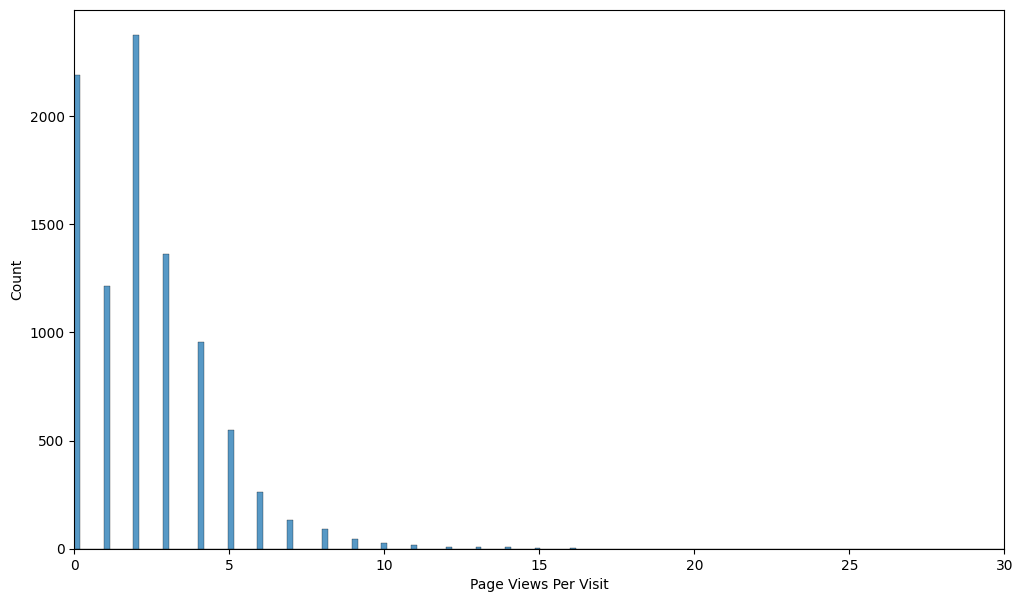

In [136]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(data=df["Page Views Per Visit"])
plt.xlim(0, 30)

<Axes: xlabel='count', ylabel='City'>

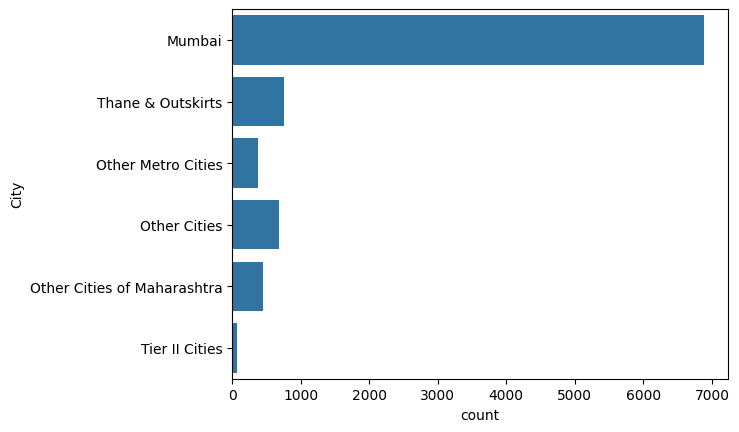

In [137]:
sns.countplot(df["City"])